<a href="https://colab.research.google.com/github/Eunchong1276/Marketing-Analysis/blob/main/Marketing_Analysis_PJT01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Analytics**

## **배경**
현재는 2014년 3월, 000님은 가상의 온라인 커머스 기업의 데이터 분석가로 해당 서비스의 데이터 분석을 진행하려고 합니다.

## **데이터 명세**
* Customer.csv : 고객의 인적 정보를 담고 있는 데이터 (고객id, 생년월일, 성별, 거주지 코드)
  * customer_id : 고객id (고객 식별 값, 보통 고유함)
  * DOB : 고객 생년월일 (날짜 형식 데이터)
  * Gender : 고객 성별 (M : 남성 / F : 여성)
  * city_code : 거주지 코드 (1부터 10까지 숫자로 구성)
* Transactions.csv : 거래 내역 데이터 (고객id, 주문id, 거래 일자, 카테고리 콛, 거래 금액 등)
  * transaction_id : 거래id (거래 발생 시 부여되는 번호)
  * cust_id : 고객id (Customer의 customer_id와 동일)
  * tran_date : 거래 일자 (날짜 형식 데이터)
  * prod_sub_cat_code : 서브 카테고리 코드 (숫자 구성)
  * prod_cat_code : 대 카테고리 코드 (숫자 구성)
  * Qty : 주문 수량 (음수로 기록된 데이터도 존재)
  * Rate : 판매 금액 (음수로 기록된 데이터도 존재)
  * Tax : 세금 (음수로 기록된 데이터에도 양수로 기록됨)
  * total_amt : 거래 금액 (판매 금액 x 주문 수량 + 세금)
  * Store_type : 거래가 발생한 판매 채널 타입 (e-shop, TeleShop, Flagship store, MBR)
* prod_cat_info : 카테고리 코드/명칭 데이터 (대 카테고리 코드/명칭, 서브 카테고리 코드/명칭)
  * prod_cat_code : 대 카테고리 코드 (Transactions 데이터에도 존재)
  * prod_cat : 대 카테고리 명칭
  * prod_sub_cat_code : 서브 카테고리 코드 (Transactions 데이터에도 존재)
  * prod_subcat : 서브 카테고리 명칭


In [ ]:
# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

# 경로  설정
import os
os.chdir('/content/drive/MyDrive/ByteDegree/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **데이터 Info Check**

In [ ]:
# 모듈 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer = pd.read_csv('Customer.csv')
transactions = pd.read_csv('Transactions.csv')
prod = pd.read_csv('prod_cat_info.csv')

In [ ]:
# 컬럼 생략 설정 해제
pd.options.display.max_columns = None

# 데이터 출력 확인
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [ ]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
prod.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [ ]:
# 데이터 형태 확인
print('Customer', customer.shape)
print('Transactions', transactions.shape)
print('Prod_cat_info', prod.shape)

Customer (5647, 4)
Transactions (23053, 10)
Prod_cat_info (23, 4)


In [ ]:
# Data Type 확인
customer.info()
print()
transactions.info()
print()
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float6

## 데이터 전처리

### 1️⃣ Customer 결측치 처리

In [ ]:
# 결측치 확인
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [ ]:
# 결측치 데이터 확인 : Gender
customer[customer['Gender'].isnull()]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0


In [ ]:
# 결측치 customer name으로 상세 정보 검색
transactions[transactions['cust_id'].isin([267199, 271626])]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
1776,85496594077,267199,27-11-2013,1,1,-4,-366,153.720,-1617.720,e-Shop
1833,85496594077,267199,24-11-2013,1,1,4,366,153.720,1617.720,e-Shop
3907,5723163001,267199,15-08-2013,6,5,1,244,25.620,269.620,e-Shop
6916,55955314599,271626,20-03-2013,11,6,5,1039,545.475,5740.475,TeleShop
8761,51951874983,271626,20-12-2012,10,5,4,845,354.900,3734.900,TeleShop
12376,78371516927,271626,29-06-2012,11,5,3,1022,321.930,3387.930,TeleShop
12810,24340761293,271626,5/6/2012,4,2,3,769,242.235,2549.235,MBR
15854,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR
22773,29245958438,267199,7/2/2011,3,1,1,278,29.190,307.190,TeleShop


In [ ]:
# customer, transaction, prod를 merge 하여 결측치 고객의 구매 제품 상세 검색(성별 판단)

customer_transactions_merge = pd.merge(left = customer, right = transactions, how = 'inner', left_on = 'customer_Id', right_on = 'cust_id' )

final_merge = pd.merge(customer_transactions_merge, prod, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'])

final_merge[final_merge['cust_id'].isin([267199, 271626])]

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction
3098,271626,02-06-1970,NaN,6.0,24340761293,271626,5/6/2012,4,2,3,769,242.235,2549.235,MBR,Footwear,4,Kids
7968,267199,14-02-1970,NaN,2.0,85496594077,267199,27-11-2013,1,1,-4,-366,153.720,-1617.720,e-Shop,Clothing,1,Women
7969,267199,14-02-1970,NaN,2.0,85496594077,267199,24-11-2013,1,1,4,366,153.720,1617.720,e-Shop,Clothing,1,Women
10011,267199,14-02-1970,NaN,2.0,29245958438,267199,7/2/2011,3,1,1,278,29.190,307.190,TeleShop,Clothing,3,Kids
11010,271626,02-06-1970,NaN,6.0,78371516927,271626,29-06-2012,11,5,3,1022,321.930,3387.930,TeleShop,Books,11,Children
12033,271626,02-06-1970,NaN,6.0,55955314599,271626,20-03-2013,11,6,5,1039,545.475,5740.475,TeleShop,Home and kitchen,11,Bath
17045,267199,14-02-1970,NaN,2.0,5723163001,267199,15-08-2013,6,5,1,244,25.620,269.620,e-Shop,Books,6,DIY
22061,271626,02-06-1970,NaN,6.0,51951874983,271626,20-12-2012,10,5,4,845,354.900,3734.900,TeleShop,Books,10,Non-Fiction


In [ ]:
# 결측치의 추정 단서 확인
# 구매 품목의 종류별 성별 분포를 확인하여 압도적으로 높은 비율을 차지하는 성별이 있으면 그 성별로 판단
# 확인결과 품목에서는 추정할만한 단서를 얻지 못했음(검색한 모든 품목의 구매자가 거의 50:50의 성비를 보임)

kids_subcat = final_merge[final_merge['prod_subcat'] == 'Kids']
DIY_subcat = final_merge[final_merge['prod_subcat'] == 'DIY']
Bath_subcat = final_merge[final_merge['prod_subcat'] == 'Bath']
Women_subcat = final_merge[final_merge['prod_subcat'] == 'Women']

# kids_subcat['Gender'].value_counts(dropna = False)
# DIY_subcat['Gender'].value_counts(dropna = False)
# Bath_subcat['Gender'].value_counts(dropna = False)
Women_subcat['Gender'].value_counts(dropna = False)

M      1529
F      1517
NaN       2
Name: Gender, dtype: int64

In [ ]:
# 결측치를 unknown으로 변경
customer['Gender'] = customer['Gender'].fillna('unknown')

# 성별 데이터 집계
customer['Gender'].value_counts()

M          2892
F          2753
unknown       2
Name: Gender, dtype: int64

In [ ]:
# 결측치 데이터 확인 : city_code
customer[customer['city_code'].isnull()]

,customer_Id,DOB,Gender,city_code
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


In [ ]:
# city_code 데이터 집계
customer['city_code'].value_counts().sort_values(ascending=False)

3.0     595
5.0     586
4.0     582
7.0     575
2.0     564
8.0     562
10.0    558
1.0     551
9.0     546
6.0     526
Name: city_code, dtype: int64

In [ ]:
# 가장 많은 값을 가진 코드 3.0으로 결측치 대체
customer['city_code'] = customer['city_code'].fillna(3)

# 결측치 다시 확인
customer[customer['city_code'].isnull()]

,customer_Id,DOB,Gender,city_code


In [ ]:
# Customer 결측치 재확인
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

### 2️⃣ 날짜 데이터 처리

#### Customer['DOB'] 처리

In [ ]:
customer['DOB'] = pd.to_datetime(customer['DOB'], format = '%d-%m-%Y')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


#### Transaction['tran_date'] 처리

In [ ]:
transactions['tran_date'].head(150)

0      28-02-2014
1      27-02-2014
2      24-02-2014
3      24-02-2014
4      23-02-2014
          ...    
145     12/2/2014
146     12/2/2014
147     12/2/2014
148     12/2/2014
149     12/2/2014
Name: tran_date, Length: 150, dtype: object

In [ ]:
# '/'를 '-'로 변경
transactions['tran_date'] = transactions['tran_date'].str.replace('/', '-')
transactions['tran_date'].head(150)

0      28-02-2014
1      27-02-2014
2      24-02-2014
3      24-02-2014
4      23-02-2014
          ...    
145     12-2-2014
146     12-2-2014
147     12-2-2014
148     12-2-2014
149     12-2-2014
Name: tran_date, Length: 150, dtype: object

In [ ]:
transactions['tran_date'] = pd.to_datetime(transactions['tran_date'], format = '%d-%m-%Y')
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


### 3️⃣ 컬럼명 데이터 전처리

#### 컬럼명 소문자로 일괄 변환

In [ ]:
# 위의 df.info()를 통해 확인한 열 이름을 참고하여 변환
# customer 컬럼명 변환
customer.columns = customer.columns.str.lower()

# transactions 컬럼명 변환
transactions.columns = transactions.columns.str.lower()

# prod 컬럼명은 모두 소문자이므로 생략

#### 동일 컬럼 통일

In [ ]:
# customer['customer_id'] = transaction[cust_id]이므로 통일
customer = customer.rename(columns = {'customer_id' : 'cust_id'})

print(customer.columns)

# transactions['prod_sub_cat_code'] = prod['prod_subcat_code'] 이므로 통일
transactions = transactions.rename(columns = {'prod_subcat_code' : 'prod_sub_cat_code'})

print(transactions.columns)

Index(['cust_id', 'dob', 'gender', 'city_code'], dtype='object')
Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'qty', 'rate', 'tax', 'total_amt', 'store_type'],
      dtype='object')


4️⃣ 파생 컬럼 생성

In [ ]:
# 거래 내역 구조 파악
transactions.head(50).sort_values(by = ['transaction_id', 'tran_date'])

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop
48,7313351894,267568,2014-02-18,2,6,4,481,202.020,2126.020,Flagship store
21,9647515879,268934,2014-02-20,7,5,3,1384,435.960,4587.960,TeleShop
35,13167171971,275149,2014-02-19,4,3,4,804,337.680,3553.680,MBR
47,14259136777,274477,2014-02-18,10,3,1,1489,156.345,1645.345,TeleShop
33,16199275450,275139,2014-02-19,4,2,1,173,18.165,191.165,MBR
18,17183929085,266863,2014-02-20,1,2,1,1359,142.695,1501.695,TeleShop
22,20781077773,269223,2014-02-20,5,3,3,1203,378.945,3987.945,TeleShop
31,22391667321,270842,2014-02-19,1,2,5,723,379.575,3994.575,MBR
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop


transaction_id 29258453508의 경우 20일에 rate 가 1497, 27일에 rate가 -1497임


이는 해당 주문을 취소한 것으로 판단됨


따라서 qty, rate, total_amt가 음수인 경우 취소건이라는 것을 알 수 있음

In [ ]:
# 주문/취소 구분 컬럼 만들기
transactions['order_status'] = transactions['total_amt'].apply(lambda x: 'Canceled' if x < 0 else 'Ordered')
transactions.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled


### 4️⃣ 이상치 데이터 전처리

#### 한 거래에 Cancel이 여러 개인 데이터 전처리

transaction_id 개수는 원래 주문 / 취소로 최대 2개, 최소 1개가 되어야 함

In [ ]:
# transaction_id가 2개 초과인 데이터가 있는지 확인
# 간단하게 transaction의 개수를 내림차순으로 확인

transactions['transaction_id'].value_counts().sort_values(ascending = False)

4170892941     4
426787191      4
32263938079    4
84896805073    3
43292728137    3
              ..
56608329204    1
26549119986    1
10833696353    1
52324711992    1
77960931771    1
Name: transaction_id, Length: 20878, dtype: int64

4개, 3개인 행도 존재하는 것을 확인


등장 횟수가 3 이상인 행만 필터링해서 데이터프레임으로 확인해 볼 필요가 있음.

In [ ]:
# 각 transaction_id의 등장 횟수를 계산
transaction_counts = transactions['transaction_id'].value_counts()

# 등장 횟수가 3 이상인 transaction_id만 필터링
transactions_id_over_2 = transaction_counts[transaction_counts >= 3].index

# 원본 데이터에서 해당 transaction_id를 가진 행만 선택
transactions_over_2 = transactions[transactions['transaction_id'].isin(transactions_id_over_2)]

# 결과 확인
transactions_over_2

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,Canceled
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,Canceled
84,51750724947,273420,2014-02-16,6,5,2,791,166.11,1748.11,TeleShop,Ordered
206,33632846691,268606,2014-02-09,3,1,-5,-1146,601.65,-6331.65,e-Shop,Canceled
240,33632846691,268606,2014-02-07,3,1,-5,-1146,601.65,-6331.65,e-Shop,Canceled
...,...,...,...,...,...,...,...,...,...,...,...
22724,72065891759,274661,2011-02-10,3,2,-3,-140,44.10,-464.10,MBR,Canceled
22745,72065891759,274661,2011-02-09,3,2,3,140,44.10,464.10,MBR,Ordered
22840,79705520455,272663,2011-02-04,12,5,-4,-1322,555.24,-5843.24,e-Shop,Canceled
22884,79705520455,272663,2011-02-02,12,5,-4,-1322,555.24,-5843.24,e-Shop,Canceled


In [ ]:
# transactions_over_2에서 transaction_id 그룹의 'ordered'행 개수
transactions_over_2['transaction_id'][transactions_over_2['order_status'] == 'Ordered'].value_counts().max()

1

출력된 데이터프레임을 봤을 때, 취소가 두 건 이상임을 확인


transactions_over_2에서 ordered의 개수가 1개씩인지 확인


transactions_over_2에서 'order_status'가 'Ordered' 데이터를 먼저 필터링하고,

transaction_id의 개수의 최대값이 1이면 주문 거래건수는 모두 1건일 것임


즉, transaction이 3건 이상인 것은 모두 주문은 1건이고, 나머지는 취소 거래일 것임.

따라서 이를 정상적으로 처리하려면 취소 거래인 건수를 한 건만 남겨둘 필요가 있음

In [ ]:
# 전체 데이터에 적용 - transaction_id , tran_date 순으로 정렬
transactions2 = transactions.sort_values(by = ['transaction_id', 'tran_date'], ascending=[True, False])
transactions2.head(30)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
19224,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered
5884,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered
2430,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered
21760,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered
4239,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered
15739,18629385,273648,2012-01-16,12,6,3,1174,369.810,3891.810,e-Shop,Ordered
21710,29740699,269719,2011-03-31,7,5,3,1136,357.840,3765.840,TeleShop,Ordered
18108,33156503,267524,2011-09-24,1,2,3,545,171.675,1806.675,e-Shop,Ordered
21479,38816402,274437,2011-04-12,12,5,3,543,171.045,1800.045,TeleShop,Ordered
11651,41453307,269572,2012-08-04,6,5,4,552,231.840,2439.840,e-Shop,Ordered


In [ ]:
# 순번 매기기
transactions2['row_num'] = transactions2.groupby(['transaction_id', 'order_status']).cumcount() + 1
transactions2.head(30)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,row_num
19224,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1
5884,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1
2430,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1
21760,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1
4239,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1
15739,18629385,273648,2012-01-16,12,6,3,1174,369.810,3891.810,e-Shop,Ordered,1
21710,29740699,269719,2011-03-31,7,5,3,1136,357.840,3765.840,TeleShop,Ordered,1
18108,33156503,267524,2011-09-24,1,2,3,545,171.675,1806.675,e-Shop,Ordered,1
21479,38816402,274437,2011-04-12,12,5,3,543,171.045,1800.045,TeleShop,Ordered,1
11651,41453307,269572,2012-08-04,6,5,4,552,231.840,2439.840,e-Shop,Ordered,1


In [ ]:
# 순번이 1인 것만 남기기
transactions2 = transactions2[transactions2['row_num'] == 1]
transactions2.groupby('row_num').size()

row_num
1    22935
dtype: int64

#### Order 없이 Cancel만 있는 거래 데이터 삭제

In [ ]:
#transaction_id 단위로 각 주문상태별 레코드 집계
od_ca_result = transactions2.groupby('transaction_id').agg(
    od_n = pd.NamedAgg(column = 'order_status', aggfunc = lambda x : (x == 'Ordered').sum()),
    ca_n = pd.NamedAgg(column = 'order_status', aggfunc = lambda x : (x == 'Canceled').sum())
).reset_index()

od_ca_result.head()

,transaction_id,od_n,ca_n
0,3268991,1,0
1,7073244,1,0
2,10861359,1,0
3,15741026,1,0
4,16165359,1,0


In [ ]:
# od_n이 0인 행만 필터링 후 omit_df 객체로 assign
omit_df = od_ca_result[od_ca_result['od_n'] == 0]
omit_df

,transaction_id,od_n,ca_n
1851,8868056339,0,1
20329,97439039119,0,1


In [ ]:
# 해당 이상치 제거
transactions3 = transactions2[~transactions2['transaction_id'].isin(omit_df['transaction_id'])]
transactions3 = transactions3.reset_index(drop = True)
transactions3.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,row_num
0,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1
1,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1
4,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1


In [ ]:
# transactions3을 transactions로 다시 Assign 후 row_num 컬럼 삭제
transactions = transactions3.drop(columns = ['row_num'])

transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     22933 non-null  int64         
 1   cust_id            22933 non-null  int64         
 2   tran_date          22933 non-null  datetime64[ns]
 3   prod_sub_cat_code  22933 non-null  int64         
 4   prod_cat_code      22933 non-null  int64         
 5   qty                22933 non-null  int64         
 6   rate               22933 non-null  int64         
 7   tax                22933 non-null  float64       
 8   total_amt          22933 non-null  float64       
 9   store_type         22933 non-null  object        
 10  order_status       22933 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 1.9+ MB


## Feature Engineering & EDA

#### 연령 범주형 컬럼 생성

In [ ]:
# 2011년 시점을 기준으로 5세 단위로 연령 구간 생성
customer['age'] = 2011-customer['dob'].dt.year

customer['age_group'] = pd.cut(customer['age'], bins=range(0,100,5), right=False, labels=[f'{i}-{i+4}' for i in range(0, 95, 5)])

customer.head()

,cust_id,dob,gender,city_code,age,age_group
0,268408,1970-01-02,M,4.0,41,40-44
1,269696,1970-01-07,F,8.0,41,40-44
2,268159,1970-01-08,F,8.0,41,40-44
3,270181,1970-01-10,F,2.0,41,40-44
4,268073,1970-01-11,M,1.0,41,40-44


In [ ]:
# age 구간별 고객 수
customer_age = pd.DataFrame(customer['age_group'].value_counts())

customer_age

,age_group
20-24,1251
30-34,1240
35-39,1222
25-29,1198
40-44,475
15-19,261
0-4,0
65-69,0
85-89,0
80-84,0


<Axes: xlabel='age_group', ylabel='count'>

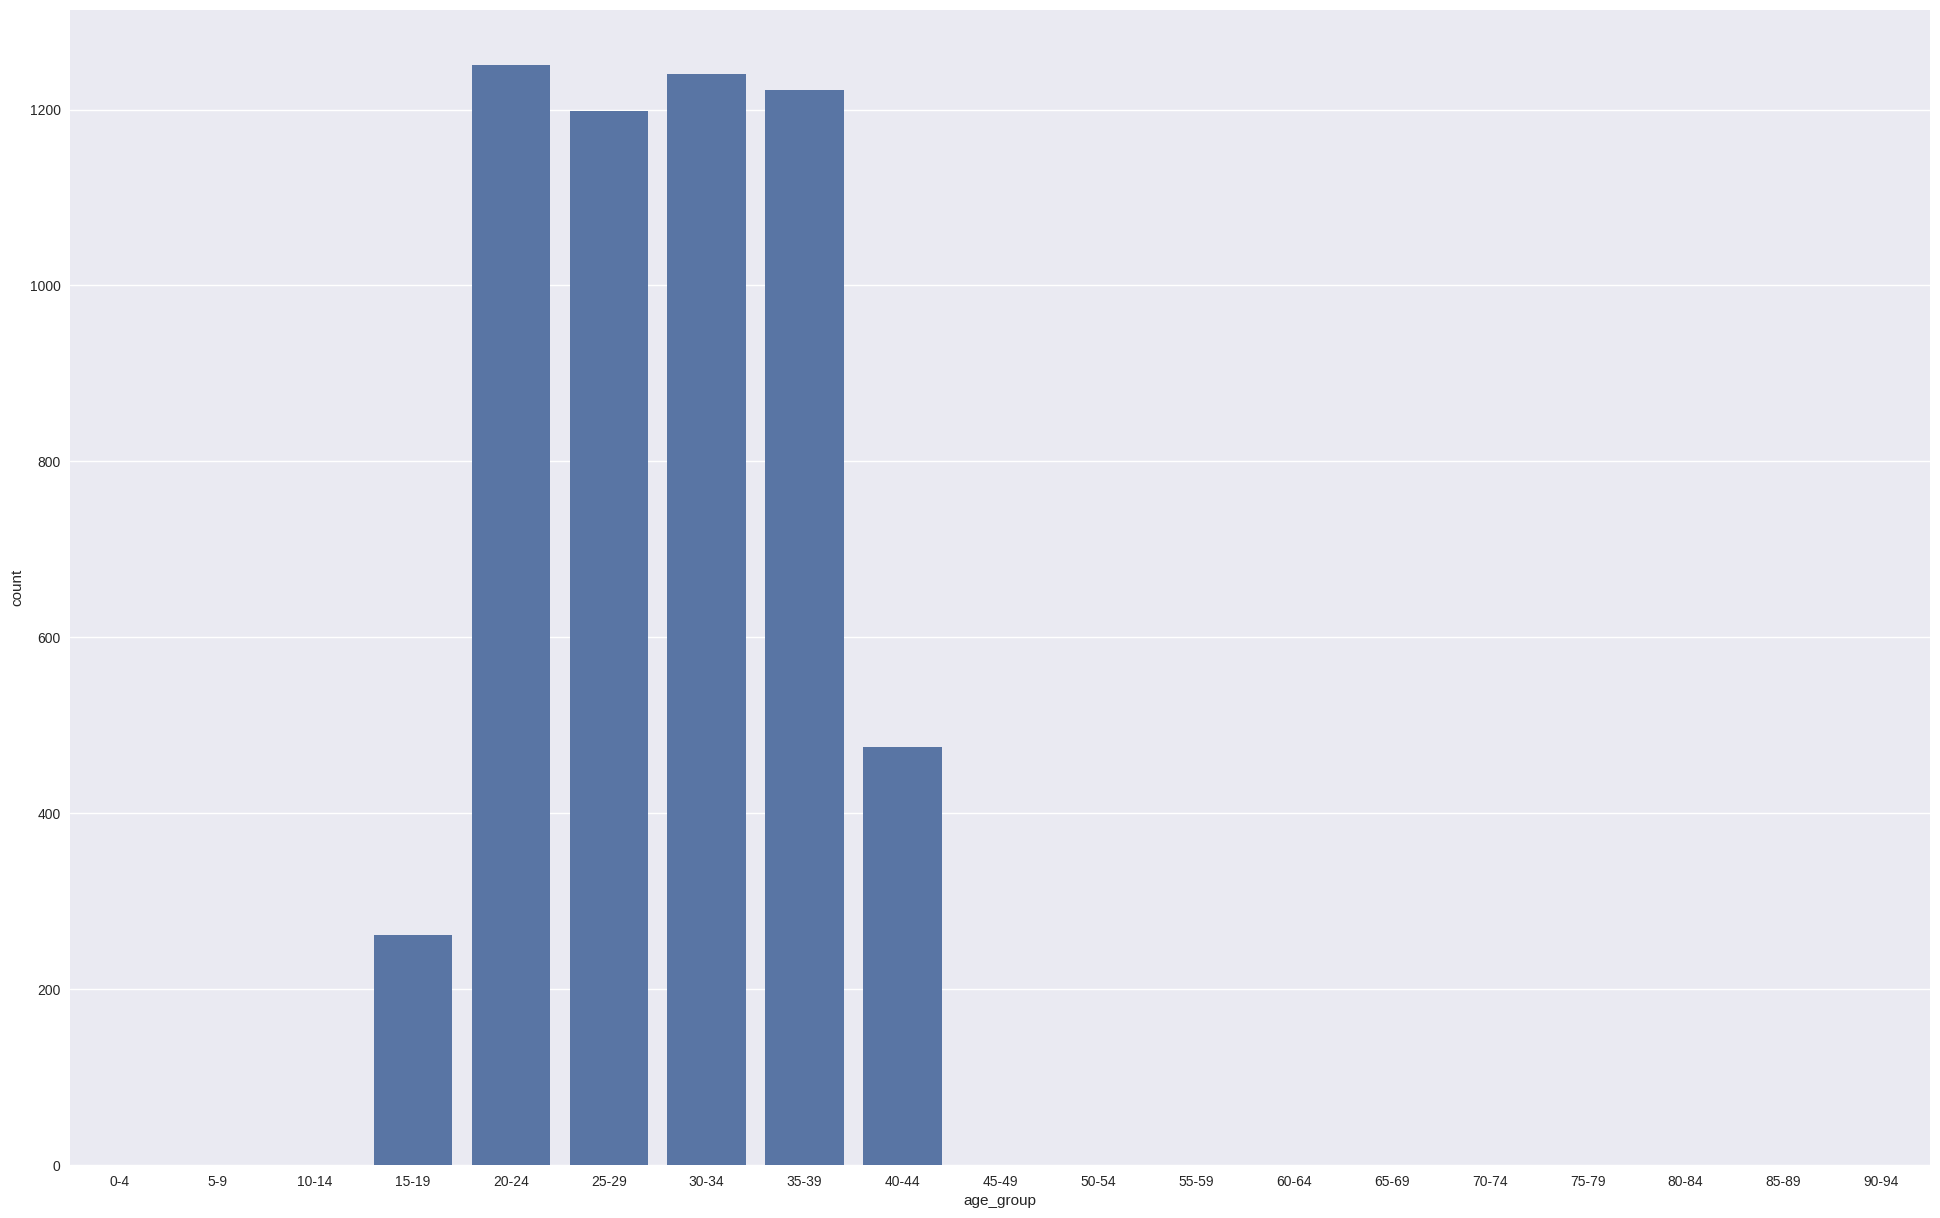

In [ ]:
# 연령구간별 고객 통계 데이터 시각화(Bar)
plt.figure(figsize = (24, 15))
sns.countplot(x = 'age_group', data = customer)

In [ ]:
# gender별 고객 수
customer_gender = pd.DataFrame(customer['gender'].value_counts()).T
customer_gender

,M,F,unknown
gender,2892,2753,2


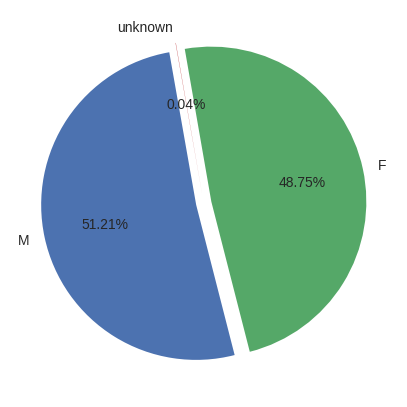

In [ ]:
# 성별 고객 통계 데이터 시각화(Pie chart)
plt.figure(figsize = (5, 10))
plt.pie(customer_gender.iloc[0], labels=customer_gender.columns, autopct = '%0.2f%%', startangle = 100, explode = [0.05, 0.05, 0.05])
plt.show()

#### 구매 경과일수 및 구매 주기 구하기

## **시나리오 : 캠페인 성과 측정**
```
고객별 구매 경과일수를 기준으로 구매 경과일수가 30일 이상인 고객을 대상으로 재구매 유도를 위한 캠페인을 진행하려고 한다.
캠페인 기간은 2013년 3월 1일부터 2013년 12월 31일까지이다.
구매 반응한 고객 수를 몇퍼센트가 반응하였는지를 도출하여 캠페인에 대한 성과를 알아보려고 한다.
```

방법
```
1. 경과일수가 30일 이상인 cust_id를 추출

2. 구매일자가 2013-03-01 ~ 2013-12-31인 데이터프레임을 다시 만듦

3. 해당 데이터프레임에 cust_id를 기준으로 다시 groupby를 사용

4. 경과일수 30일 이상인 cust_id와 구매일자가 캠페인 기간인 cust_id가 같은 데이터만 추출

5. 고객 수 및 비율 도출
```

In [ ]:
# 구매가 확정된 거래만 분리해서 데이터프레임 생성
df_ordered = transactions[transactions['order_status'] == 'Ordered']

df_ordered

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
0,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered
1,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered
4,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered
...,...,...,...,...,...,...,...,...,...,...,...
22927,99963516507,273791,2013-09-22,12,5,2,1053,221.130,2327.130,Flagship store,Ordered
22928,99967775192,266852,2012-01-20,2,6,2,539,113.190,1191.190,Flagship store,Ordered
22929,99985121471,271104,2013-02-04,4,3,3,220,69.300,729.300,Flagship store,Ordered
22931,99986751618,274814,2014-01-11,1,1,5,923,484.575,5099.575,MBR,Ordered


In [ ]:
# 구매 경과일수 및 구매 주기 구하기
# 기준일 : 2013년 2월 28일

# 2013년 2월 28일 이후 데이터는 제외
df_20130228 = df_ordered[df_ordered['tran_date'] <= pd.to_datetime('2013-02-28')].reset_index(drop=True)

df_20130228.sort_values(by = 'tran_date', ascending = False).head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
4452,31384159740,273805,2013-02-28,3,5,2,435,91.350,961.350,e-Shop,Ordered
12977,91610903734,268663,2013-02-28,1,1,2,1129,237.090,2495.090,e-Shop,Ordered
4850,34152951993,271251,2013-02-28,1,1,5,1409,739.725,7784.725,Flagship store,Ordered
3196,22522867791,269168,2013-02-28,9,3,4,916,384.720,4048.720,e-Shop,Ordered
7880,55783903593,274576,2013-02-28,9,3,2,1342,281.820,2965.820,MBR,Ordered


In [ ]:
# cust_id를 기준으로 groupby를 하여 첫 구매일, 마지막 구매일 도출
cust_ord_df = df_20130228.groupby('cust_id')['tran_date'].agg(
    fst_ord_date = np.min,
    last_ord_date = np.max,
    cnt_ord_days = np.size
).reset_index()

cust_ord_df

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days
0,266783,2011-09-23,2013-02-20,4
1,266784,2012-08-23,2012-12-04,3
2,266785,2011-03-15,2013-02-13,6
3,266788,2011-06-12,2013-02-12,4
4,266794,2011-03-18,2012-11-27,9
...,...,...,...,...
5184,275257,2011-12-05,2013-02-26,3
5185,275261,2011-09-26,2011-09-26,1
5186,275262,2011-08-13,2012-02-29,2
5187,275264,2011-08-05,2011-10-08,2


In [ ]:
# 기존일로부터 마지막 구매 경과일수
cust_ord_df['diff_ord_days'] = (pd.to_datetime('2013-02-28') - cust_ord_df['last_ord_date']).dt.days

cust_ord_df

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days
0,266783,2011-09-23,2013-02-20,4,8
1,266784,2012-08-23,2012-12-04,3,86
2,266785,2011-03-15,2013-02-13,6,15
3,266788,2011-06-12,2013-02-12,4,16
4,266794,2011-03-18,2012-11-27,9,93
...,...,...,...,...,...
5184,275257,2011-12-05,2013-02-26,3,2
5185,275261,2011-09-26,2011-09-26,1,521
5186,275262,2011-08-13,2012-02-29,2,365
5187,275264,2011-08-05,2011-10-08,2,509


In [ ]:
# diff_ord_days가 30일 이상인 유저만 추출하여 데이터프레임 객체로 지정
ord_after_30_cust = cust_ord_df[cust_ord_df['diff_ord_days'] >= 30]

ord_after_30_cust.sort_values(by = 'last_ord_date', ascending=False)

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days
2160,270335,2011-11-17,2013-01-29,2,30
3771,272972,2013-01-29,2013-01-29,1,30
374,267402,2011-03-30,2013-01-29,5,30
907,268304,2012-04-19,2013-01-29,3,30
2417,270755,2013-01-29,2013-01-29,1,30
...,...,...,...,...,...
4206,273676,2011-01-26,2011-01-26,1,764
4234,273723,2011-01-26,2011-01-26,1,764
1279,268885,2011-01-25,2011-01-25,1,765
4393,273982,2011-01-25,2011-01-25,1,765


In [ ]:
# 마지막 구매 일수가 2013-03-01 ~ 2013-12-31인 데이터프레임 생성
df_campaign =  df_ordered[(df_ordered['tran_date'] >= pd.to_datetime('2013-03-01')) & (df_ordered['tran_date'] <= pd.to_datetime('2013-12-31'))].reset_index(drop=True)

df_campaign

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
0,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered
1,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered
2,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered
3,43751965,272070,2013-08-30,10,6,2,1020,214.200,2254.200,Flagship store,Ordered
4,49441287,268804,2013-11-23,11,6,3,279,87.885,924.885,Flagship store,Ordered
...,...,...,...,...,...,...,...,...,...,...,...
5714,99934833874,269365,2013-06-12,5,3,1,82,8.610,90.610,e-Shop,Ordered
5715,99942287499,274839,2013-08-26,4,1,3,605,190.575,2005.575,TeleShop,Ordered
5716,99947326428,270360,2013-04-25,10,3,5,273,143.325,1508.325,e-Shop,Ordered
5717,99957916781,274187,2013-09-20,4,4,2,202,42.420,446.420,TeleShop,Ordered


In [ ]:
# cust_id를 기준으로 groupby를 하여 첫 구매일, 마지막 구매일 도출
cust_campaign_df = df_campaign.groupby('cust_id')['tran_date'].agg(
    fst_ord_date = np.min,
    last_ord_date = np.max,
    cnt_ord_days = np.size
).reset_index()

cust_campaign_df

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days
0,266785,2013-08-01,2013-08-01,1
1,266794,2013-06-29,2013-06-29,1
2,266799,2013-09-24,2013-09-24,1
3,266804,2013-06-08,2013-06-08,1
4,266805,2013-12-27,2013-12-27,1
...,...,...,...,...
3579,275252,2013-05-25,2013-12-24,4
3580,275255,2013-10-04,2013-10-04,1
3581,275257,2013-09-02,2013-09-02,1
3582,275261,2013-06-27,2013-10-05,2


In [ ]:
# df_campaign의 cust_id에 존재하는 ord_after_30_cust['cust_id']만 추출
response_cust = ord_after_30_cust[ord_after_30_cust['cust_id'].isin(cust_campaign_df['cust_id'])]

response_cust
# 반대로 추출해서 개수가 같은지 검증: 2982 row로 같았음
# cust_campaign_df[cust_campaign_df['cust_id'].isin(ord_after_30_cust['cust_id'])]

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days
4,266794,2011-03-18,2012-11-27,9,93
5,266799,2012-03-11,2012-03-11,1,354
12,266814,2012-03-03,2012-11-01,3,119
13,266815,2012-01-04,2012-11-22,2,98
14,266816,2011-04-17,2012-02-21,3,373
...,...,...,...,...,...
5179,275247,2012-02-12,2012-02-12,1,382
5180,275249,2011-05-04,2012-05-05,2,299
5183,275252,2011-04-27,2012-10-25,6,126
5185,275261,2011-09-26,2011-09-26,1,521


In [ ]:
# 반응 비율 측정
response_cust.shape[0] / ord_after_30_cust.shape[0] * 100

63.70433668019654

간략하게 계산해본 결과 캠페인 구매 반응 고객은 경과일수 30일 이상인 고객 전체 대비 63%로 높은 성과를 보였습니다.

다음은 cust_id를 기준으로 customer 데이터프레임과 join 하여 성별, 연령 구간별 구매주기 및 경과일수 차이를 확인해 보겠습니다.

기준일은 그대로 2013-02-28일로 설정하였습니다.

In [ ]:
# customer DF와 cust_ord_df Merge
df_merge_1 = pd.merge(cust_ord_df, customer, on = 'cust_id')

df_merge_1

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days,dob,gender,city_code,age,age_group
0,266783,2011-09-23,2013-02-20,4,8,1974-05-01,M,4.0,37,35-39
1,266784,2012-08-23,2012-12-04,3,86,1991-12-13,F,10.0,20,20-24
2,266785,2011-03-15,2013-02-13,6,15,1985-06-29,F,3.0,26,25-29
3,266788,2011-06-12,2013-02-12,4,16,1972-03-20,F,2.0,39,35-39
4,266794,2011-03-18,2012-11-27,9,93,1971-02-28,F,9.0,40,40-44
...,...,...,...,...,...,...,...,...,...,...
5184,275257,2011-12-05,2013-02-26,3,2,1987-10-25,M,5.0,24,20-24
5185,275261,2011-09-26,2011-09-26,1,521,1973-03-21,F,10.0,38,35-39
5186,275262,2011-08-13,2012-02-29,2,365,1973-06-06,M,10.0,38,35-39
5187,275264,2011-08-05,2011-10-08,2,509,1991-10-24,M,4.0,20,20-24


Text(0.5, 1.0, 'diff_ord_days by gender')

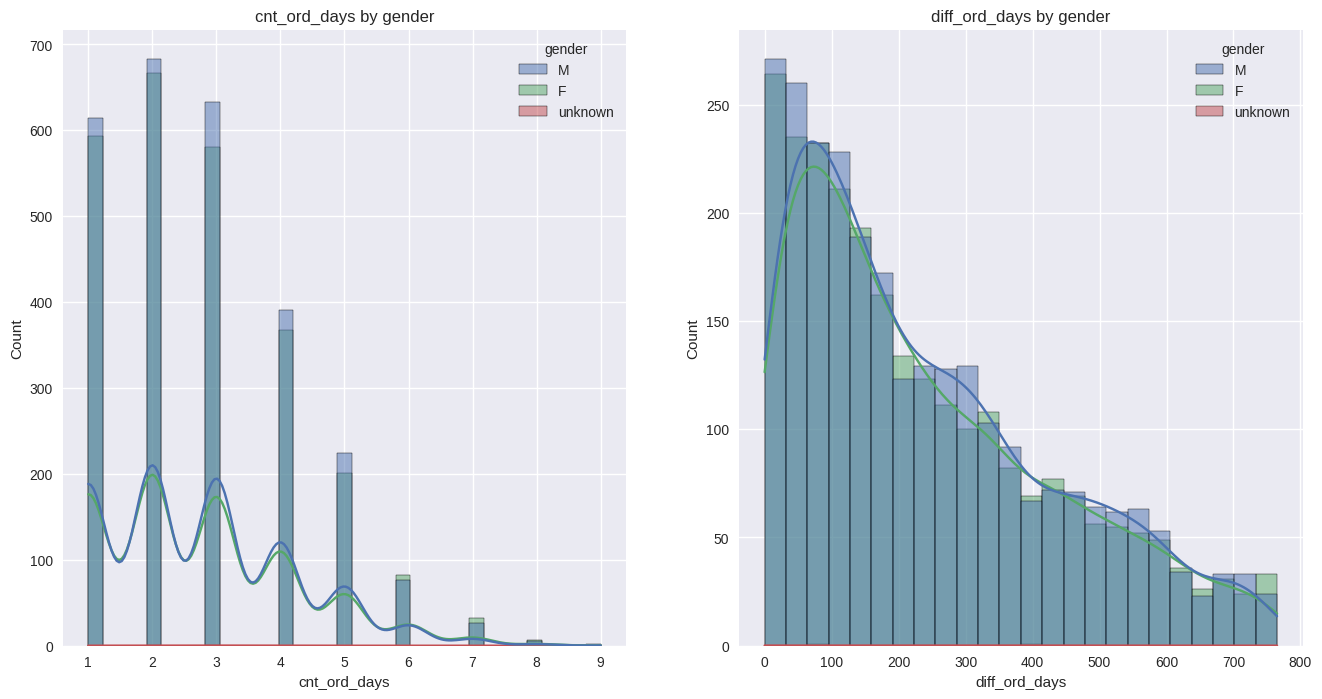

In [ ]:
# 성별 별 구매주기 분포 시각화
fig = plt.figure(figsize = (16, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
plt.style.use(['seaborn-v0_8'])

sns.histplot(x = 'cnt_ord_days', hue = 'gender', kde = True, data = df_merge_1, ax=ax1)

# 성별 별 구매경과일수 분포 시각화
sns.histplot(x = 'diff_ord_days', hue = 'gender', kde = True, data = df_merge_1, ax=ax2)

ax1.set_title('cnt_ord_days by gender')
ax2.set_title('diff_ord_days by gender')

히스토그램으로 확인결과 남성이 여성보다 구매 주기가 약간 짧은 편이나 유의미한 수치는 아니라고 판단됩니다.

구매경과일수 또한 성별 간의 유의미한 차이는 발견되지 않았습니다.

<Axes: xlabel='age_group', ylabel='diff_ord_days'>

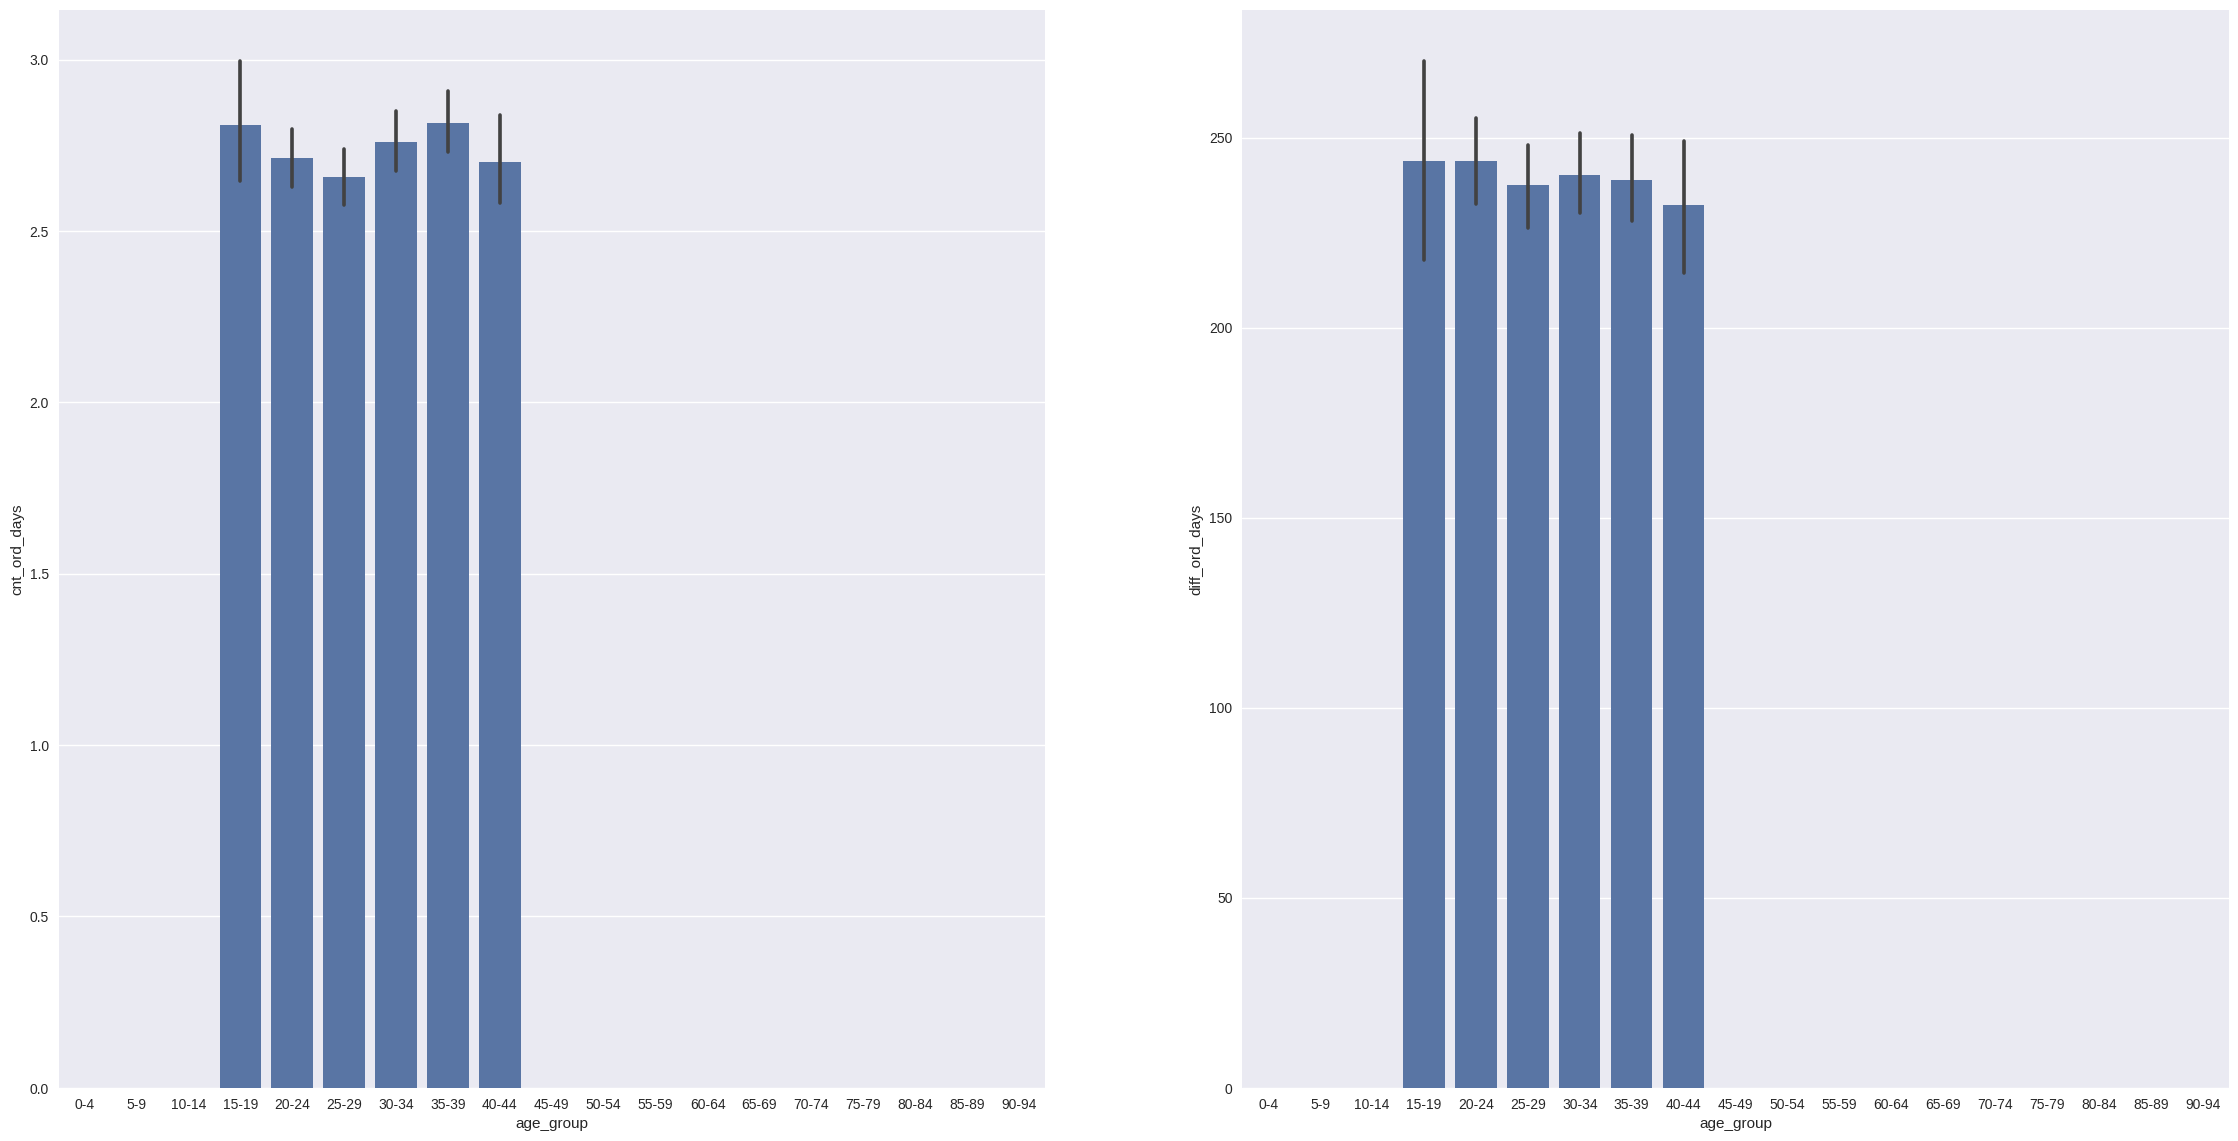

In [ ]:
# 연령구간별 구매주기 시각화
fig = plt.figure(figsize = (28, 14))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
plt.style.use(['seaborn-v0_8'])

sns.barplot(x = 'age_group', y = 'cnt_ord_days', data = df_merge_1, ax=ax1)

# 연령구간별 구매경과일수 시각화
sns.barplot(x = 'age_group', y = 'diff_ord_days', data = df_merge_1, ax=ax2)

확인결과 25-29세, 40-44세 구간이 타 구간보다 구매 주기가 짧고 구매 경과일수 또한 낮은 편이었습니다.

##EDA 2

### 구매 특성 분석

#### 요일별 구매 특성 확인

In [ ]:
# 요일별 구매 건수 차이 확인
# tran_date를 요일로 변환하는 컬럼 만들기
df_ordered.loc[:, 'weekday'] = df_ordered['tran_date'].dt.day_name()

# 요일별 구매 건수 데이터프레임 만들기
weekday_tran_df = df_ordered.groupby('weekday').size().reset_index()

weekday_tran_df.columns = ['weekday', 'tran_count']

weekday_tran_df

,weekday,tran_count
0,Friday,3035
1,Monday,2916
2,Saturday,2959
3,Sunday,3027
4,Thursday,3017
5,Tuesday,2929
6,Wednesday,2993


<Axes: xlabel='weekday', ylabel='Count'>

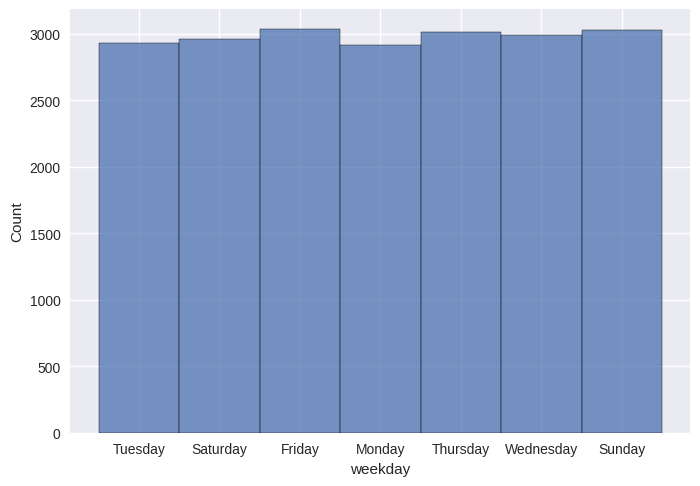

In [ ]:
# 요일별 구매 건수 히스토그램 시각화
sns.histplot(x = 'weekday', data = df_ordered)

#### 카테고리별 매출 확인

다음은 prod를 조인하여 카테고리별 매출을 분석해보겠습니다.순서는 아래와 같습니다.

1. transactions과 prod 조인하여 거래별 카테고리, 서브카테고리 확인
2. 카테고리별 월평균 매출액 도출(기준: 2011년 ~ 2013년)
3. 카테고리별 월평균 매출액 컬럼을 prod_info에 조인
4. describe로 각 카테고리별 월평균 매출액의 분산과 표준편차 도출

In [ ]:
# transactions과 prod 조인
tran_prod = pd.merge(transactions, prod)

# tran_prod에 기준 년도 데이터만 필터링
tran_prod = tran_prod[(tran_prod['tran_date'] >= pd.to_datetime('2011-01-01')) & (tran_prod['tran_date'] <= pd.to_datetime('2013-12-31'))]

# tran_date에서 년월만 추출한 컬럼 만들기
tran_prod['year_month'] = tran_prod['tran_date'].dt.strftime('%Y-%m')

# 카테고리와 월 기준으로 그룹화 후 total_amt 합계 데이터프레임 만들기
total_amt_df = tran_prod.groupby(['prod_cat', 'year_month'])['total_amt'].sum().reset_index()

# 카테고리별 월평균 매출 도출
mean_amt_df = total_amt_df.groupby('prod_cat')['total_amt'].mean().reset_index()

mean_amt_df

,prod_cat,total_amt
0,Bags,109989.612778
1,Books,341885.311806
2,Clothing,166151.913056
3,Electronics,286007.579722
4,Footwear,166962.399861
5,Home and kitchen,224803.010972


In [ ]:
total_amt_df['prod_cat'].unique()

array(['Bags', 'Books', 'Clothing', 'Electronics', 'Footwear',
       'Home and kitchen'], dtype=object)

<Axes: xlabel='prod_cat', ylabel='total_amt'>

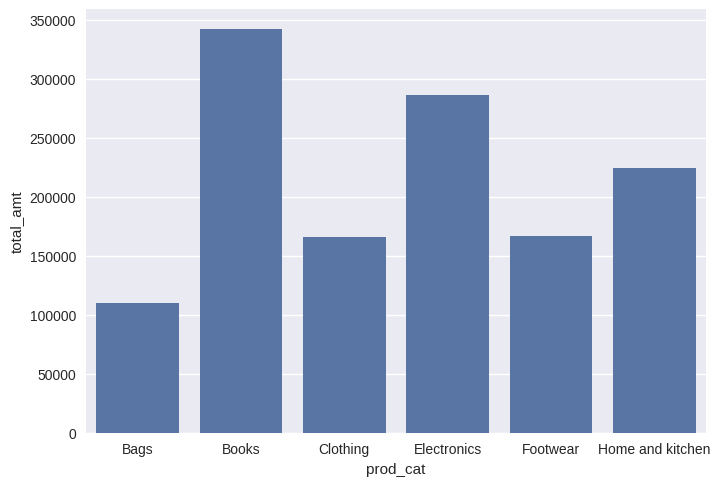

In [ ]:
# 카테고리별 월평균 매출 시각화
sns.barplot(x = 'prod_cat' , y = 'total_amt', data = mean_amt_df)

In [ ]:
# 카테고리별 월평균 매출의 분산과 표준편차 도출
mean_amt_df.describe()

,total_amt
count,6.000000
mean,215966.638032
std,85969.040322
min,109989.612778
25%,166354.534757
50%,195882.705417
75%,270706.437535
max,341885.311806


In [ ]:
# 변동 계수 도출
cv = (mean_amt_df['total_amt'].std() / mean_amt_df['total_amt'].mean()) * 100
print('변동 계수 :', cv ,'%')

변동 계수 : 39.80662990599156 %


데이터를 시각화하고 변동 계수를 도출했을 때, 카테고리별 월평균 매출액이 차이가 크다는 것을 확인했습니다.

추가로, 각 카테고리의 월별 매출의 추이를 라인 그래프를 통해 시각화 해보겠습니다.

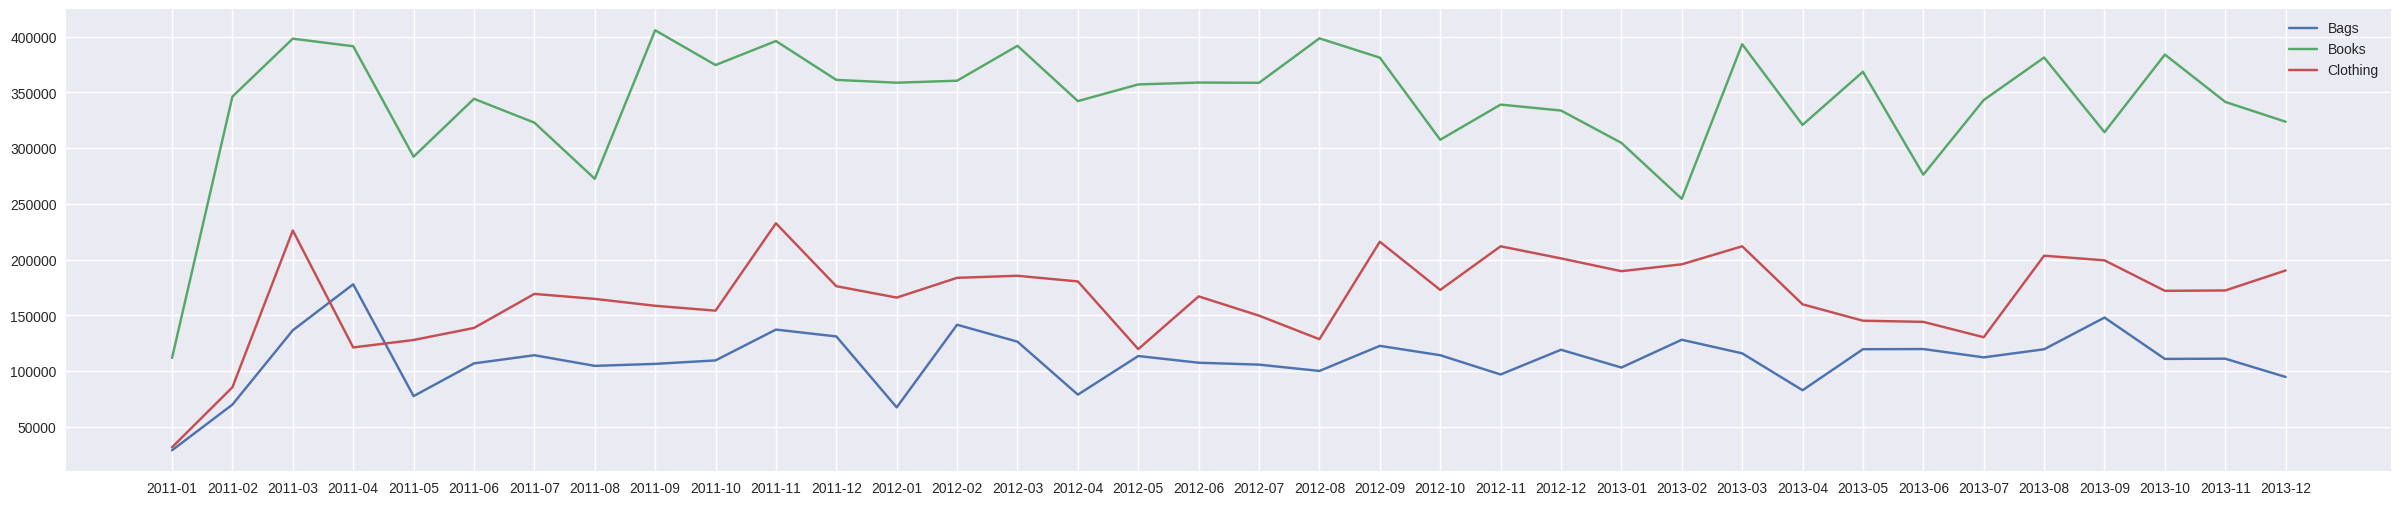

In [ ]:
# 앞서 만든 total_amt_df의 카테고리별로 라인 그래프를 시각화

df1 = total_amt_df[total_amt_df['prod_cat'] == 'Bags'].sort_values(by=['year_month'])
df2 = total_amt_df[total_amt_df['prod_cat'] == 'Books'].sort_values(by=['year_month'])
df3 = total_amt_df[total_amt_df['prod_cat'] == 'Clothing'].sort_values(by=['year_month'])
df4 = total_amt_df[total_amt_df['prod_cat'] == 'Electronics'].sort_values(by=['year_month'])
df5 = total_amt_df[total_amt_df['prod_cat'] == 'Footwear'].sort_values(by=['year_month'])
df6 = total_amt_df[total_amt_df['prod_cat'] == 'Home and kitchen'].sort_values(by=['year_month'])

plt.plot(df1['year_month'], df1['total_amt'], label='Bags')
plt.gcf().set_size_inches(30,6)

plt.plot(df2['year_month'], df2['total_amt'], label='Books')
plt.gcf().set_size_inches(30,6)

plt.plot(df3['year_month'], df3['total_amt'], label='Clothing')
plt.gcf().set_size_inches(30,6)

plt.legend()

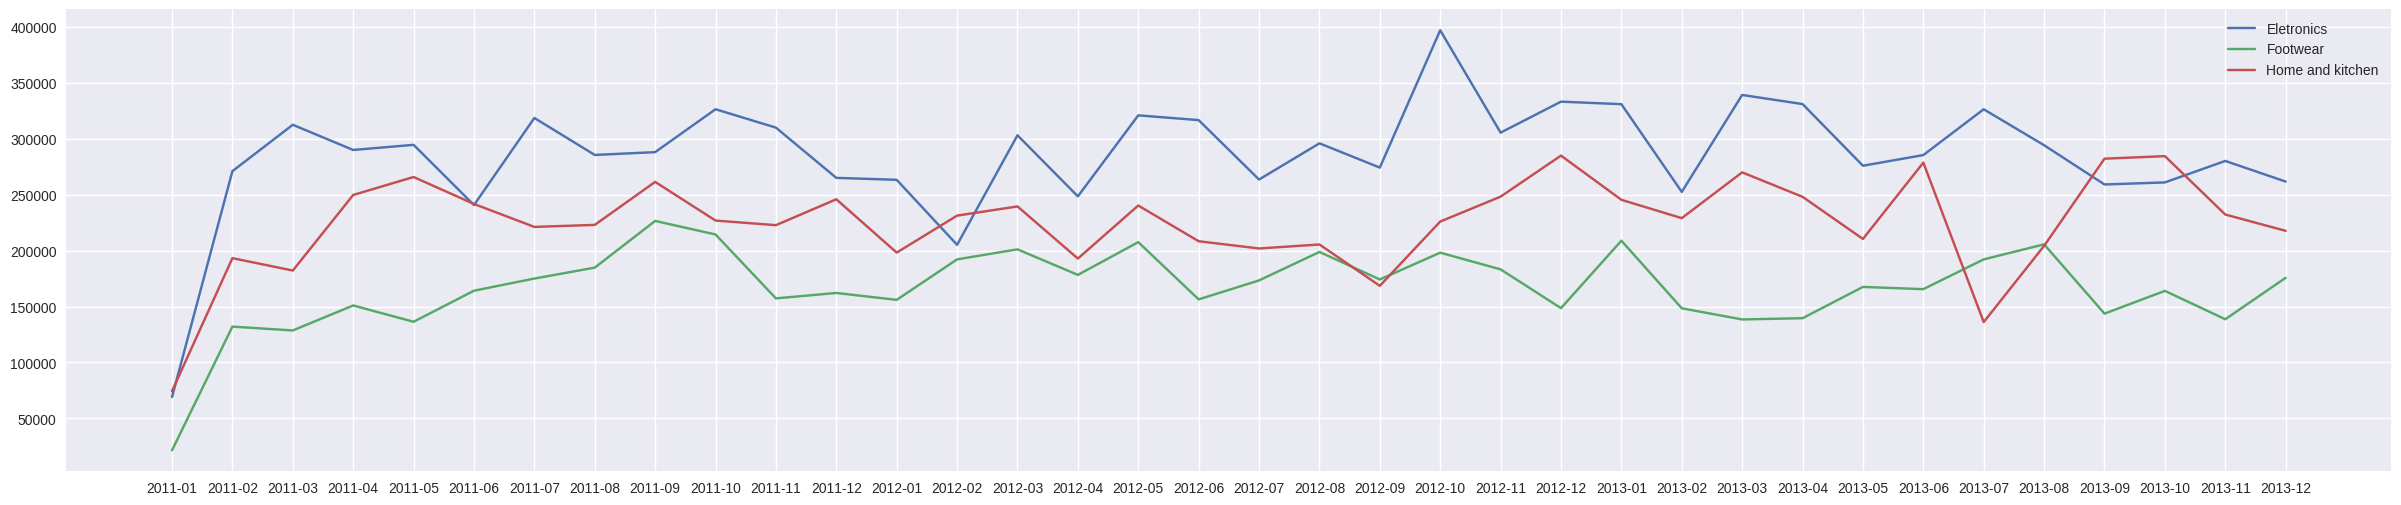

In [ ]:
plt.plot(df4['year_month'], df4['total_amt'], label='Eletronics')
plt.gcf().set_size_inches(30,6)

plt.plot(df5['year_month'], df5['total_amt'], label='Footwear')
plt.gcf().set_size_inches(30,6)

plt.plot(df6['year_month'], df6['total_amt'], label='Home and kitchen')
plt.gcf().set_size_inches(30,6)

plt.legend()

## 비즈니스 문제 정의
1. 매출이 저조한 카테고리 : 하위 3개의 카테고리의 매출이 저조한 원인은 무엇일까?
> 카테고리 특성 분석 : 주문 수량, 고객 1인 거래량, 판매 채널 비율

2. 판매 금액이 높은 카테고리(비용 컬럼이 없어서 정확하지 않으나 기업서 이득을 많이 보는 상품이라고 가정)
> 주문량을 증가시킬 방안 마련을 위한 분석 : 판매 채널, 고객 1인 거래량
3. 충성 고객
> 충성 고객의 기준을 지정 후 카테고리별로 얼마만큼의 충성 고객을 확보하고 있는지 확인

##### 1. 하위 3개 카테고리의 매출이 저조한 원인은 무엇일까?
앞서 확인했듯이 매출이 저조한 카테고리는 'Bags', 'Clothing', 'Footwear'입니다.

해당 카테고리만 필터링 후 주문 수량, 거래량 대비 고객 수, 판매 채널 비율을 분석해 보겠습니다.

In [ ]:
# 매출이 저조한 카테고리만 추출
low_amt_tran = tran_prod[tran_prod['prod_cat'].isin([ 'Bags', 'Clothing', 'Footwear'])]

# 카테고리, 판매채널 별 주문 수량
cat_qty = low_amt_tran.groupby(['prod_cat', 'store_type'])['qty'].sum().reset_index()

cat_qty

,prod_cat,store_type,qty
0,Bags,Flagship store,932
1,Bags,MBR,955
2,Bags,TeleShop,870
3,Bags,e-Shop,1770
4,Clothing,Flagship store,1325
5,Clothing,MBR,1405
6,Clothing,TeleShop,1346
7,Clothing,e-Shop,2789
8,Footwear,Flagship store,1372
9,Footwear,MBR,1336


세 카테고리 모두 e-Shop에서 월등히 많은 주문 수량을 보입니다. 다만 그 외에 특이한 점은 없었습니다.

In [ ]:
# 카테고리별 구매 고객 수
cat_cust_cnt = low_amt_tran.groupby('prod_cat')['cust_id'].nunique()

# 카테고리별 거래량
cat_tran_cnt = low_amt_tran.groupby('prod_cat')['transaction_id'].nunique()

# 카테고리별 고객 1인 거래량
cust_ratio = cat_tran_cnt / cat_cust_cnt
cust_ratio_format = cust_ratio.apply(lambda x: '{:.2f}'.format(x))

print('고객 1인 거래량')
print(cust_ratio_format)

고객 1인 거래량
prod_cat
Bags        1.16
Clothing    1.24
Footwear    1.25
dtype: object


결과를 확인했을 때, 고객 1인 거래량은 모두 1에 가깝습니다. 이는 **단발성 구매가 많고 충성 고객이 적다**는 결과로 볼 수 있겠습니다.

In [ ]:
# 판매 채널별 거래 수
transactions_per_cat_store = low_amt_tran.groupby(['prod_cat', 'store_type']).size().reset_index(name='count')

# 각 카테고리별 전체 거래 수
total_transactions_per_cat = transactions_per_cat_store.groupby('prod_cat')['count'].transform('sum')

# 비율 계산
transactions_per_cat_store['ratio'] = transactions_per_cat_store['count'] / total_transactions_per_cat * 100

# 결과 출력
print(transactions_per_cat_store)

    prod_cat      store_type  count      ratio
0       Bags  Flagship store    374  19.715340
1       Bags             MBR    395  20.822351
2       Bags        TeleShop    391  20.611492
3       Bags          e-Shop    737  38.850817
4   Clothing  Flagship store    550  19.741565
5   Clothing             MBR    602  21.608040
6   Clothing        TeleShop    532  19.095477
7   Clothing          e-Shop   1102  39.554917
8   Footwear  Flagship store    556  19.454164
9   Footwear             MBR    579  20.258922
10  Footwear        TeleShop    574  20.083975
11  Footwear          e-Shop   1149  40.202939


거래량과 구매량으로 데이터를 다르게 분석해봤지만 유의미한 차이가 없었습니다.


##### **결과**
1번 문제(매출 하위 3개의 카테고리의 저조한 매출의 원인은 무엇인가?)는 고객의 재구매 비율이 낮았기 때문임이 가장 유력한 원인이라고 판단됩니다.

##### 2. 판매 금액이 높은 카테고리의 매출을 증가시키려면 어떻게 해야할까?

먼저 기존에 병합했던 tran_prod의 그룹화를 통해 카테고리별 판매 금액 = 가격(rate)의 평균, 중위값을 도출합니다.

이후 가격이 가장 높은(기업에서 이윤이 가장 많이 남는다고 가정)한 카테고리의 데이터프레임을 만들어 분석해 보겠습니다.

In [ ]:
# 구매 확정된 데이터만 prod DF와 조인(마이너스가 나오면 평균에 영향을 미칠 수 있음)
tran_prod_purchase = pd.merge(df_ordered, prod)

# 카테고리별 가격 평균, 중위값, 표준편차 등
tran_prod_purchase.groupby('prod_cat')['rate'].describe()

,count,mean,std,min,25%,50%,75%,max
prod_cat,,,,,,,,
Bags,1789.0,792.226383,420.829466,71.0,420.00,795.0,1163.00,1499.0
Books,5486.0,791.581845,413.680784,70.0,433.00,799.0,1154.00,1500.0
Clothing,2676.0,789.266069,415.080324,70.0,428.00,800.0,1159.25,1500.0
Electronics,4485.0,786.570792,419.240526,70.0,422.00,793.0,1145.00,1500.0
Footwear,2708.0,781.452733,412.792912,70.0,427.00,772.0,1146.00,1500.0
Home and kitchen,3732.0,774.677653,413.840557,70.0,419.75,767.0,1130.25,1500.0


예상으로는 전자 기기가 다른 카테고리보다 더 높은 가격을 형성할 것이라고 생각했는데, 모두 평균과 중위값이 유사한 결과가 나왔습니다.
그렇다면, 서브 카테고리로 다시 확인해 보겠습니다.

In [ ]:
# 서브카테고리별 가격 평균, 중위값, 표준편차 등 (중위값으로 내림차순 정렬)
tran_prod_purchase.groupby('prod_subcat')['rate'].describe().reset_index().sort_values(by = '50%', ascending = False)

,prod_subcat,count,mean,std,min,25%,50%,75%,max
0,Academic,863.0,800.677868,416.077142,70.0,442.50,814.0,1174.50,1498.0
9,Furnishing,906.0,790.962472,416.459763,71.0,418.25,808.5,1165.00,1500.0
3,Cameras,898.0,788.976615,419.346485,70.0,434.25,801.0,1134.25,1500.0
13,Mobiles,947.0,790.375924,415.835963,71.0,426.50,801.0,1146.50,1500.0
4,Children,934.0,800.513919,409.358020,72.0,464.25,800.0,1149.75,1495.0
7,DIY,905.0,786.951381,411.344614,72.0,423.00,800.0,1147.00,1499.0
12,Mens,2626.0,793.741051,414.872976,71.0,436.25,797.5,1162.00,1500.0
8,Fiction,940.0,783.106383,423.472728,71.0,406.50,796.0,1151.75,1498.0
10,Kids,1817.0,790.330765,419.795131,70.0,418.00,796.0,1157.00,1500.0
5,Comics,928.0,787.034483,408.654602,70.0,427.50,794.0,1139.75,1500.0


큰 차이는 아니지만 일단 Academic이 중위값도 가장 크고 평균값도 가장 큰 서브카테고리로 확인되었습니다.

해당 카테고리로 필터링한 뒤 고객 1인 거래량, 판매 채널을 확인해 보겠습니다.

In [ ]:
# Academic 판매 채널 비율
academic_tran = tran_prod_purchase[tran_prod_purchase['prod_subcat'] == 'Academic']

academic_per = academic_tran.groupby('store_type').size().reset_index()

academic_per.columns = ['store_type', 'count']

academic_per['ratio'] = academic_per['count'] / (167 + 180 + 164 + 352) * 100

academic_per

,store_type,count,ratio
0,Flagship store,167,19.351101
1,MBR,180,20.857474
2,TeleShop,164,19.003476
3,e-Shop,352,40.787949


In [ ]:
# 서브카테고리 1인 거래량
# 카테고리별 구매 고객 수
subcat_cust_cnt = tran_prod_purchase.groupby('prod_subcat')['cust_id'].nunique()

# 카테고리별 거래량
subcat_tran_cnt = tran_prod_purchase.groupby('prod_subcat')['transaction_id'].nunique()

# 카테고리별 고객 1인 거래량
cust_ratio = subcat_tran_cnt / subcat_cust_cnt
cust_ratio_format = cust_ratio.apply(lambda x: '{:.2f}'.format(x))

print('고객 1인 거래량')
print(cust_ratio_format)

고객 1인 거래량
prod_subcat
Academic               1.08
Audio and video        1.08
Bath                   1.08
Cameras                1.09
Children               1.08
Comics                 1.08
Computers              1.08
DIY                    1.08
Fiction                1.08
Furnishing             1.07
Kids                   1.17
Kitchen                1.09
Mens                   1.24
Mobiles                1.08
Non-Fiction            1.10
Personal Appliances    1.08
Tools                  1.10
Women                  1.26
dtype: object


##### **결과**

서브카테고리로 다시 한번 나누어서 1인 거래량을 확인해보니 모두 1에 가까운 결과가 나왔습니다. 서브카테고리 중에서 가격이 가장 높은 품목도 재구매율이 현저히 낮은 것으로 판단됩니다.

따라서 재구매율을 증가시킬 수 있는 전략이 필요합니다.

##### 3. 기업의 충성 고객은 얼마나 있을까?(전체 데이터 기준)
유저 리텐션, 충성 고객은 매출에 중요한 영향을 미치므로 각 카테고리별로 충성 고객이 얼마나 있는지 확인해 보겠습니다.

충성 고객에는 원래 다양한 지표가 반영되어야 정확한 책정이 가능하지만 여기서는 거래 주기와 거래량으로 충성 고객을 책정할 예정입니다.

먼저 전체 거래에서 가장 거래량이 많은 고객 수를 확인한 뒤 충성 고객의 지표를 설정하도록 하겠습니다.

In [ ]:
# 구매 확정인 전체 거래에서 고객 구매 평균 확인
top_20_pur_cust = df_ordered.groupby('cust_id').size().reset_index()

top_20_pur_cust.columns = ['cust_id', 'count']

top_20_pur_cust.describe()

,cust_id,count
count,5506.000000,5506.000000
mean,271034.044315,3.791500
std,2453.208153,1.835597
min,266783.000000,1.000000
25%,268908.250000,2.000000
50%,271024.500000,4.000000
75%,273171.750000,5.000000
max,275265.000000,11.000000


중위값이 4이고 75%가 5인 것을 봤을 때, 제3사분위수 이후부터 급격하게 재구매량이 많아지는 것으로 추정됩니다.

In [ ]:
# 구매확정 고객만 필터링
tran_prod_pur = tran_prod[tran_prod['order_status'] == 'Ordered']

# cust_id를 기준으로 groupby를 하여 첫 구매일, 마지막 구매일 도출
cust_ord_df_ttl = tran_prod_pur.groupby('cust_id')['tran_date'].agg(
    fst_ord_date = np.min,
    last_ord_date = np.max,
    cnt_ord_days = np.size
).reset_index()

cust_ord_df_ttl

# 기존일(데이터의 가장 최근일)로부터 마지막 구매 경과일수
cust_ord_df_ttl['diff_ord_days'] = (tran_prod_pur['tran_date'].max() - cust_ord_df_ttl['last_ord_date']).dt.days

cust_ord_df_ttl

,cust_id,fst_ord_date,last_ord_date,cnt_ord_days,diff_ord_days
0,266783,2011-09-23,2013-02-20,4,314
1,266784,2012-08-23,2012-12-04,3,392
2,266785,2011-03-15,2013-08-01,7,152
3,266788,2011-06-12,2013-02-12,4,322
4,266794,2011-03-18,2013-06-29,10,185
...,...,...,...,...,...
5468,275257,2011-12-05,2013-09-02,4,120
5469,275261,2011-09-26,2013-10-05,3,87
5470,275262,2011-08-13,2012-02-29,2,671
5471,275264,2011-08-05,2011-10-08,2,815


In [ ]:
# 구매주기가 7일 이하이고 구매경과일수가 30일 이하인 고객
target_customers = cust_ord_df_ttl[(cust_ord_df_ttl['cnt_ord_days'] >= 7) &
                                   (cust_ord_df_ttl['diff_ord_days'] <= 30)]

target_customers

# df_ordered, cust_ord_df_20131231 조인
df_merge_2013 = pd.merge(tran_prod_pur, target_customers)

vip_customers_df = df_merge_2013.groupby('cust_id').size().reset_index()

vip_customers_df.columns = ['cust_id', 'pur_count']

# 구매횟수가 7회 이상인 고객 필터링
vip_customers_df[vip_customers_df['pur_count'] >= 7]

,cust_id,pur_count
0,267014,8
1,267025,7
2,267045,8
3,267134,8
4,267465,9
...,...,...
84,274795,8
85,274832,7
86,274854,10
87,274948,9


##### **결과**
구매주기가 7일 이하, 구매경과일수가 30일 이하, 구매회수가 7회 이상인 고객은 전체 고객(5,647명) 중 89명으로, 약 1.5%입니다.